In [1]:
import tensorflow as tf
import numpy as np
from formatData import loadData
from sklearn.model_selection import train_test_split
from gan import GenAdvNetwork
import os
from matplotlib import pyplot as plt

2023-03-18 03:45:47.067137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
"""
Loading data
Note than we can only specify absolute location of the raw data
"""
molRep2D, energies = loadData(12, "/home/panthibivek/thesis/GAN_pkg/data/traj.xyz")
#randomize the data and split it into training and test set
# unison_shuffle(molRep2D, energies)
X_train, X_test, y_train, y_test = train_test_split(molRep2D,energies,
                                   random_state=104, 
                                   test_size=0.1, 
                                   shuffle=True)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)

input data size: (10000, 78)
output data size: (10000,)
Training data size: (9000, 78)
Test data size: (1000, 78)


In [3]:
latent_dim_ = 78
epochs_ = 50
batch_size_ = 32
y_train = np.reshape(y_train, (-1, 1))
X_train = np.array(X_train)
X_train = X_train.astype(float)
X_train = np.reshape(X_train, (-1, 78, 1))
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size=100).batch(batch_size_)

2023-03-18 03:45:49.305195: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-18 03:45:49.305683: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-18 03:45:49.607729: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-18 03:45:49.607796: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-18 03:45:49.607839: I tensorflow/compiler/xla/stream_executo

In [4]:
GAN_model = GenAdvNetwork(latent_dim=latent_dim_, batch_size=batch_size_)
GAN_model.compile(
    generator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    discriminator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    disc_loss=tf.keras.losses.BinaryCrossentropy(),
    gen_loss=tf.keras.losses.MAE
)
history = GAN_model.fit(dataset, epochs=epochs_)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                1027      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 13)                0         
                                                                 
 reshape (Reshape)           (None, 13, 1)             0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 39, 128)          640       
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 39, 128)           0         
                                                                 
 batch_normalization (BatchN  (None, 39, 128)          512       
 ormalization)                                           

2023-03-18 03:45:49.702533: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.705026: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.716010: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.716573: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.720705: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.721713: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.723070: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.725159: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.726215: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 26, 64)            320       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 26, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 128)           32896     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 13, 128)           0         
                                                                 
 batch_normalization_2 (Batc  (None, 13, 128)          512       
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 1664)              0         
                                                     

2023-03-18 03:45:49.844428: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.845359: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.857064: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.857691: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.868148: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.869864: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.870799: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.871327: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49.872997: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:49

  1/282 [..............................] - ETA: 45s - g_loss: 7.2636 - d_loss: 1.9996

2023-03-18 03:45:50.048140: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:50.048902: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:50.052364: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:50.053556: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:50.054560: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:50.055562: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:50.058823: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:50.059586: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 03:45:50.061600: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


282/282 [==============================] - 18s 64ms/step - g_loss: 6.4990 - d_loss: 0.1191
Epoch 2/50
282/282 [==============================] - 18s 64ms/step - g_loss: 3.7720 - d_loss: 5.0726e-04
Epoch 3/50
282/282 [==============================] - 18s 63ms/step - g_loss: 3.1128 - d_loss: 5.9171e-04
Epoch 4/50
282/282 [==============================] - 18s 63ms/step - g_loss: 2.8071 - d_loss: 6.7539e-04
Epoch 5/50
282/282 [==============================] - 18s 64ms/step - g_loss: 2.6598 - d_loss: 6.2758e-05
Epoch 6/50
282/282 [==============================] - 18s 63ms/step - g_loss: 2.5809 - d_loss: 7.3394e-05
Epoch 7/50
282/282 [==============================] - 18s 64ms/step - g_loss: 2.5287 - d_loss: 0.0020
Epoch 8/50
282/282 [==============================] - 18s 63ms/step - g_loss: 2.4569 - d_loss: 2.8968e-05
Epoch 9/50
282/282 [==============================] - 18s 63ms/step - g_loss: 2.4025 - d_loss: 3.8620e-04
Epoch 10/50
282/282 [==============================] - 18s 63ms/s

In [5]:
train_dir = os.path.dirname(os.path.abspath("__file__")) + "/runs/train/exp2/weights/"
GAN_model.save_weights(train_dir, save_format='tf')

2023-03-18 04:00:49.821306: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 04:00:49.826436: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 04:00:49.827062: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 04:00:49.827611: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 04:00:49.828546: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 04:00:49.828959: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 04:00:49.829842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 04:00:49.830202: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 04:00:49.831196: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-18 04:00:49

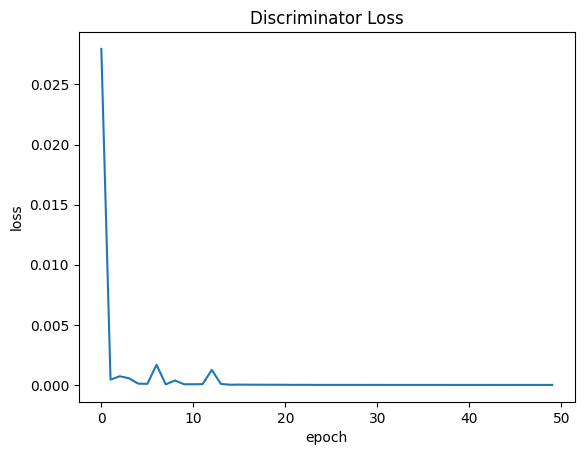

In [6]:
plt.plot(history.history['d_loss'])
plt.yscale('log')
plt.title('Discriminator Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
fig1 = plt.gcf()
plt.show()
fig1.savefig(train_dir + 'disLoss.png', dpi = 300)

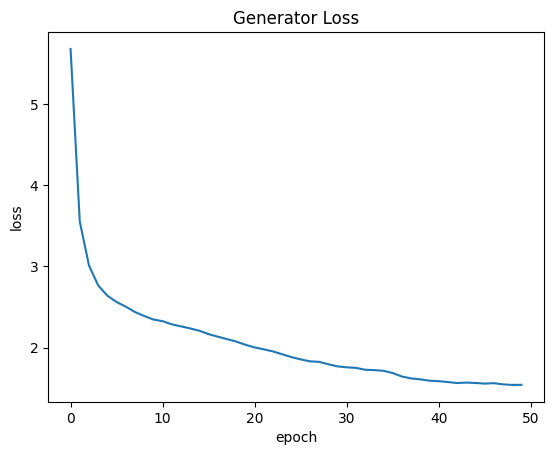

In [7]:
plt.plot(history.history['g_loss'])
plt.yscale('log')
plt.title('Generator Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
fig2 = plt.gcf()
plt.show()
fig2.savefig(train_dir + 'genLoss.png', dpi = 300)

In [8]:
from utils import random_generator
# generated_sample = GAN_model.generate_trajectories(1)
random_data = random_generator((1, latent_dim_))
print(random_data)
generated_sample = GAN_model.generator(random_data)
print(generated_sample)

tf.Tensor(
[[-0.92502183  0.93879551  1.1016078   0.33403304 -0.90312207  0.80300695
  -0.80572456 -0.08386854 -0.37716955  0.68517935 -0.34544602 -1.10069931
  -0.6486302  -2.19302464  0.73654032  0.46105036 -0.03679788 -1.27666986
   2.22324705  2.17599368 -0.17629115 -0.24033388  1.63846624 -0.85089159
   0.57384217 -0.90253192  0.14641754 -0.32606474 -0.66454345 -1.30200827
   0.30141866  1.3804425   0.07033329  0.5919311   0.82211453 -0.60856199
  -0.72358441 -0.26047418 -0.70019943 -0.56622404 -0.89048368  1.35579371
   0.12857275 -0.89312834  0.3850643   0.02462664  1.13777745  1.99303317
  -1.01613343  0.16181906  0.06366666  1.24804556  0.32053381  1.03143954
   1.05482519 -0.6267252  -2.78002191 -0.82569754  0.96891564 -0.66975051
  -0.95857489  0.09046633  1.19311261  0.37940067 -2.32178068  1.01957166
   0.8218748   0.28702226 -1.70426369  1.04600418 -0.7870965  -1.63174975
   1.13192523 -1.8017751   0.68594033 -0.50553614 -1.33623636  0.34814435]], shape=(1, 78), dtype=flo